In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
dswine = pd.read_csv('winequality-red.csv')

In [3]:
dswine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dswine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
np.sum(dswine.isnull())

c:\Program Files\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
dswine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
x = dswine.iloc[:, :-1].values
y = dswine.iloc[:, -1].values

In [8]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

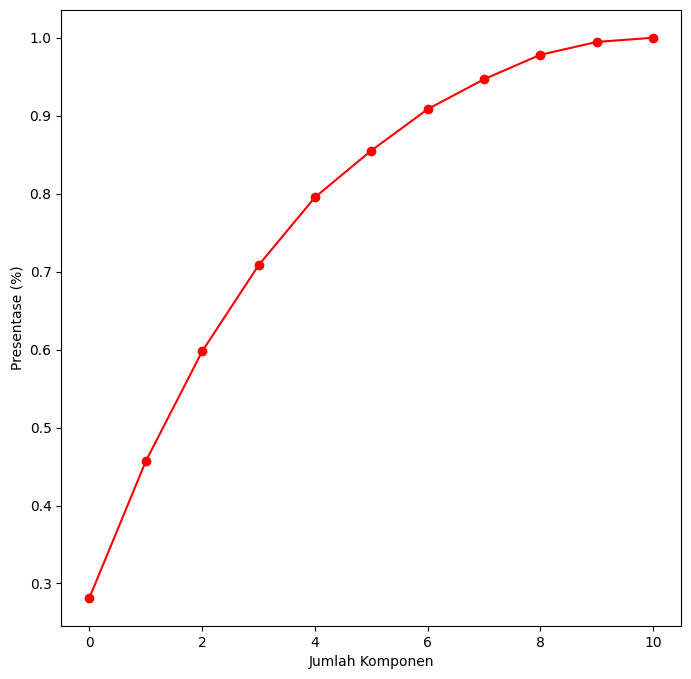

In [11]:
pca=PCA()
x_pca=pca.fit_transform(x)
plt.figure(figsize=(8,8))
plt.ylabel("Presentase (%)")
plt.xlabel("Jumlah Komponen")
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')

In [12]:
pca_new=PCA(n_components=6)
x_new=pd.DataFrame(pca_new.fit_transform(x))

In [13]:
print(x_new)

             0         1         2         3         4         5
0    -1.619530  0.450950 -1.774454  0.043740  0.067014  0.913921
1    -0.799170  1.856553 -0.911690  0.548066 -0.018392 -0.929714
2    -0.748479  0.882039 -1.171394  0.411021 -0.043531 -0.401473
3     2.357673 -0.269976  0.243489 -0.928450 -1.499149  0.131017
4    -1.619530  0.450950 -1.774454  0.043740  0.067014  0.913921
...        ...       ...       ...       ...       ...       ...
1594 -2.150500  0.814286  0.617063  0.407687 -0.240936 -0.054835
1595 -2.214496  0.893101  1.807402  0.414003  0.119592  0.674711
1596 -1.456129  0.311746  1.124239  0.491877  0.193716  0.506410
1597 -2.270518  0.979791  0.627965  0.639770  0.067735  0.860408
1598 -0.426975 -0.536690  1.628955 -0.391716  0.450482  0.496154

[1599 rows x 6 columns]


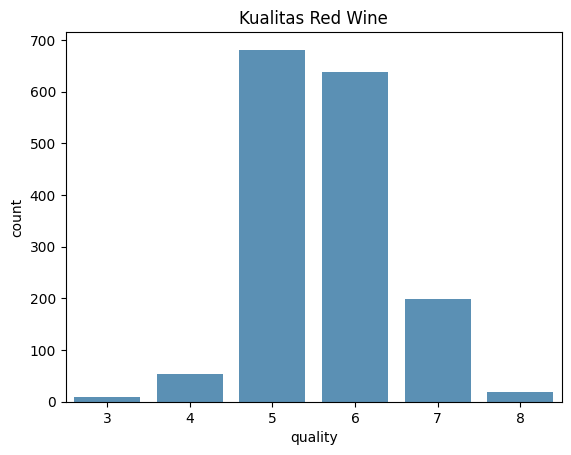

In [14]:
sns.countplot(x=dswine['quality'], alpha=0.8)
plt.title("Kualitas Red Wine")
plt.show()

In [15]:
bins=(2,6.5,8)
group_names=['buruk','baik']
categories=pd.cut(dswine['quality'],bins,labels=group_names)
dswine['quality']=categories

<Axes: title={'center': 'Kualitas Red Wine'}, ylabel='count'>

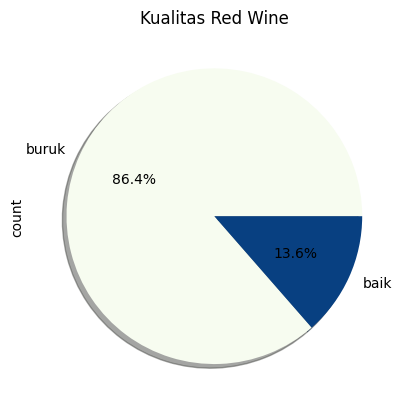

In [16]:
plt.title("Kualitas Red Wine")
dswine['quality'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,cmap="GnBu")

<Axes: ylabel='fixed acidity'>

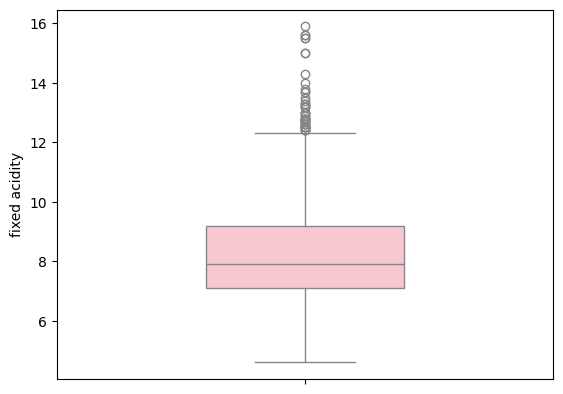

In [17]:
sns.boxplot(y=dswine['fixed acidity'],width=0.4,color='pink')

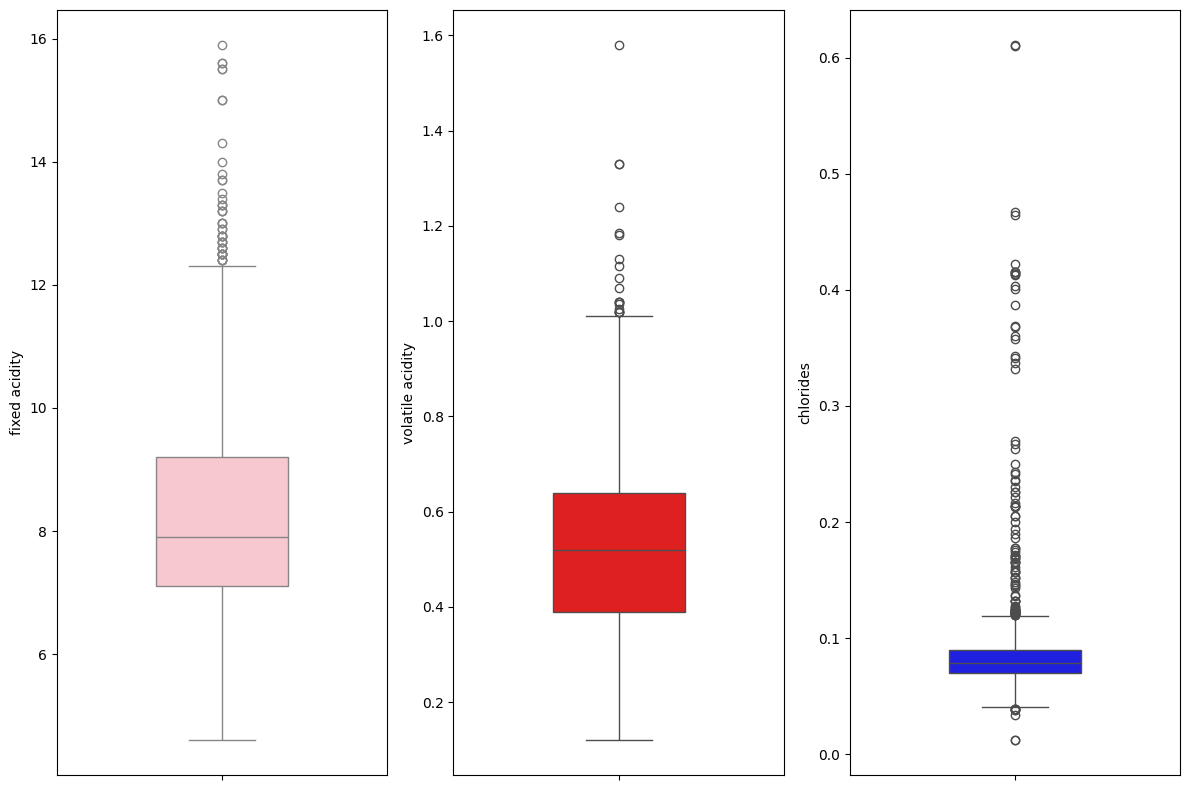

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8)) 
sns.boxplot(y=dswine['fixed acidity'], width=0.4, color='pink', ax=ax[0])
sns.boxplot(y=dswine['volatile acidity'], width=0.4, color='red', ax=ax[1])
sns.boxplot(y=dswine['chlorides'], width=0.4, color='blue', ax=ax[2])
plt.tight_layout()
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
modelregresi = LinearRegression()

In [20]:
modelregresi.fit(x_train,y_train)

LinearRegression()

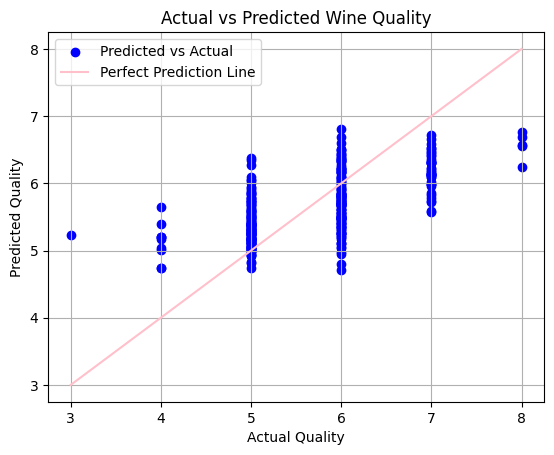

In [21]:
y_predict = modelregresi.predict(x_test)
y_pred = y_predict.flatten()
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='pink', label='Perfect Prediction Line')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
def predict_new_data(input_data, modelregresi, scaler):
    data_baru = np.array(input_data)
    data_baru = scaler.transform(data_baru)
    prediksi_baru = modelregresi.predict(data_baru)
    return prediksi_baru
    

In [23]:
data_baru = ([
    [7.6, 0.58, 0.12, 2.3, 0.084, 16.0, 45.0, 0.9975, 3.48, 0.62, 9.7],
    [7.9, 0.52, 0.08, 2.5, 0.072, 12.0, 40.0, 0.9971, 3.51, 0.60, 9.8],
    [6.9, 0.66, 0.02, 1.9, 0.079, 10.0, 30.0, 0.9969, 3.45, 0.56, 9.3],
    [8.3, 0.59, 0.15, 2.2, 0.073, 17.0, 46.0, 0.9980, 3.49, 0.63, 10.2],
    [7.4, 0.62, 0.10, 2.0, 0.070, 18.0, 50.0, 0.9977, 3.47, 0.58, 9.5],
    [8.1, 0.55, 0.14, 2.1, 0.075, 14.0, 44.0, 0.9978, 3.50, 0.61, 9.9],
    [6.8, 0.64, 0.03, 1.8, 0.076, 11.0, 35.0, 0.9970, 3.46, 0.57, 9.4],
    [7.7, 0.57, 0.11, 2.4, 0.078, 20.0, 47.0, 0.9979, 3.52, 0.62, 9.6],
    [8.0, 0.60, 0.13, 2.3, 0.071, 19.0, 42.0, 0.9976, 3.48, 0.64, 10.1],
    [7.5, 0.63, 0.09, 2.0, 0.074, 15.0, 39.0, 0.9973, 3.50, 0.59, 9.5]
])

In [24]:
prediksi_baru = predict_new_data(data_baru, modelregresi, sc_x)

In [25]:
print(f"Prediksi untuk data baru: {prediksi_baru}")

Prediksi untuk data baru: [ 9.35051325 12.22436513 12.11932017  7.11766161  8.35195632  8.16047072
 11.83928449  7.32468738  9.39426524 10.31831152]
